# PROYECTO 1 
Victor Madureri


Importamos las librerias con las que vamos a trabajar y iniciamos la conexion con la base de datos

In [31]:
import datetime as dt
import matplotlib.pyplot as plt
from pandas.io import sql
import matplotlib.animation as animation
import psycopg2 
import random
import pandas as pd

conn = psycopg2.connect(host = 'raja.db.elephantsql.com', user= 'oxgcstiv', password ='FlbrCdQbjb3asidam45INxN8PHORoroc', dbname= 'oxgcstiv')


In [32]:
mac_add = "00:16:3e:4c:53:08"


que = "SELECT time_stamp, count from persona  INNER JOIN  log_cc on log_cc.mac_add = persona.mac_add WHERE  persona.mac_add = '" + mac_add+"'"
res=sql.read_sql(que,con=conn)
res.nombre = "C.C. Sambil"
for i, trial in res.iterrows():
    res.loc[i, "nombre"] = "Sambil"   
    if res.loc[i, "count"] == 1:
        res.loc[i, "accion"] = "ENTRADA CC"   
    if res.loc[i, "count"] == -1:
        res.loc[i, "accion"] = "SALIDA CC"           
res = res.drop(columns="count")
seguimiento = res


que = "SELECT time_stamp, count, tienda.nombre from persona  INNER JOIN  log_tienda on log_tienda.mac_add = persona.mac_add  INNER JOIN tienda on tienda.id = log_tienda.id_tienda WHERE  persona.mac_add = '" + mac_add+"'"
res=sql.read_sql(que,con=conn)
for i, trial in res.iterrows():
    if res.loc[i, "count"] == 1:
        res.loc[i, "accion"] = "ENTRADA TIENDA "
    if res.loc[i, "count"] == -1:
        res.loc[i, "accion"] = "SALIDA TIENDA "             
res = res.drop(columns="count")
seguimiento = seguimiento.append(res)


que = "SELECT time_stamp, beacon.location_description from persona  INNER JOIN  beacons_log on beacons_log.mac_add = persona.mac_add  INNER JOIN beacon on beacon.id = beacons_log.id_beacon WHERE  persona.mac_add = '" + mac_add+"'"
res=sql.read_sql(que,con=conn)
for i, trial in res.iterrows():
    res.loc[i, "accion"] = "DETECTADO EN BEACON"
    res.loc[i, "nombre"] = res.loc[i, "location_description"]    
res = res.drop(columns="location_description")
seguimiento = seguimiento.append(res)


que = "SELECT time_stamp, mesa.id from persona  INNER JOIN  mesa_log on mesa_log.mac_add = persona.mac_add  INNER JOIN mesa on mesa.id = mesa_log.id_mesa WHERE  persona.mac_add = '" + mac_add+"'"
res=sql.read_sql(que,con=conn)
for i, trial in res.iterrows():
    res.loc[i, "accion"] = "SENTADO EN MESA #"
    res.loc[i, "nombre"] = res.loc[i, "id"]             
res = res.drop(columns="id")
seguimiento = seguimiento.append(res,sort=False)


seguimiento.head(20)



,accion,nombre,time_stamp
0,ENTRADA CC,Sambil,2019-06-09 14:33:41.852209
1,SALIDA CC,Sambil,2019-06-09 14:34:08.901928
0,ENTRADA TIENDA,Apple,2019-06-09 11:10:39.674219
0,DETECTADO EN BEACON,Baños Sur,2019-06-09 18:47:29.571183
1,DETECTADO EN BEACON,Baños Norte,2019-06-09 18:47:29.571183
0,SENTADO EN MESA #,12,2019-06-09 11:42:57.076994
1,SENTADO EN MESA #,16,2019-06-09 11:42:35.841776


ESTADO ACTUAL DE LAS MESAS. DE ESATR SIENDO USADAS POR UNA PERSONA CON TELEFONO INTELIGENTE MUESTRA SU IDENTIFICADOR

In [33]:
que = 'SELECT * from "Estado_Mesas"'
res=sql.read_sql(que,con=conn)
res.head(20)

,id_mesa,mac_add,estado
0,1,00:16:3e:4a:9c:28,0
1,5,00:16:3e:38:cb:2c,1
2,7,00:16:3e:4e:d5:6b,0
3,8,,1
4,12,,0
5,14,00:16:3e:2f:91:12,0
6,15,00:16:3e:0d:f0:d1,1
7,16,00:16:3e:4c:53:08,1
8,17,00:16:3e:76:fc:10,1
9,19,,1


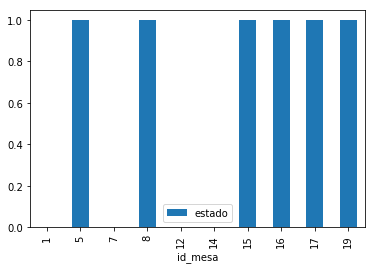

In [34]:
res.plot(kind='bar',x='id_mesa',y='estado')

In [ ]:
PIE CHART DE LAS PERSONAS QUE ENTRAN AL CENTRO COMERCIAL CON TELEFONO INTELIGENTE Y SIN EL

In [11]:
que = 'SELECT * from "Ventas_inteligentes"'
res=sql.read_sql(que,con=conn)

res.loc[0, "estado"] = "ConTelf"  
res.loc[1, "estado"] = "SinTelf" 
res.loc[0, "valor"] = res.loc[0, "contelf"]
res.loc[1, "valor"] = res.loc[0, "sintelf"]
res = res.drop(columns="sintelf")
res = res.drop(columns="contelf")
res.head()



,estado,valor
0,ConTelf,75.0
1,SinTelf,25.0


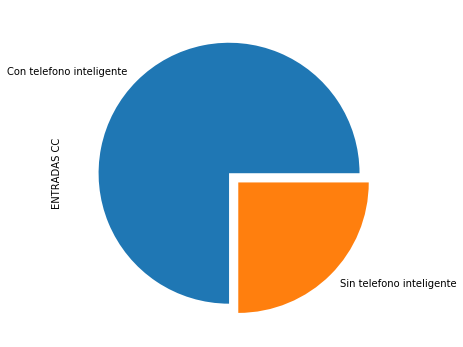

In [20]:
fruits = ["Con telefono inteligente", "Sin telefono inteligente"]
series = pd.Series([res.valor[0], res.valor[1]], 
                   index=fruits, 
                   name='ENTRADAS CC')
explode = [0, 0.10]
series.plot.pie(figsize=(6, 6),
                explode=explode)

EN ESTE CC EL ALQUILER DE EL LOCAL SE CALCULA EN BASE A LAS VENTAS DEL MES, El PA pago_alquiler nos permite calcular este alquiler del 10% de las ventas

In [26]:
que = 'select * from pago_alquiler(1)'
res=sql.read_sql(que,con=conn)
res.head()

,pago_alquiler
0,181


In [ ]:
ACCESOS POR CADA PUERTA

         nombre  count
0   Acceso Este   1009
1  Acceso Norte   1005
2    Acceso Sur    982


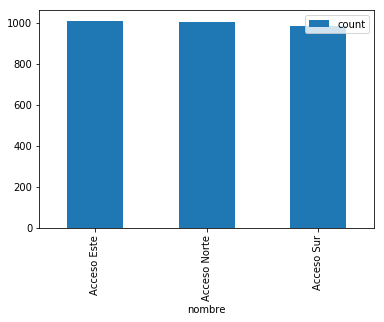

In [28]:
que = "select acceso_cc.nombre, count(acceso_cc.nombre) from acceso_cc INNER JOIN camara_cc on acceso_cc.id = camara_cc.id_acceso INNER JOIN log_cc on camara_cc.id = log_cc.id_camara WHERE acceso_cc.id_centro = 1 AND log_cc.count = 1 GROUP BY acceso_cc.nombre"
res=sql.read_sql(que,con=conn)
print(res.head())
df = res
df.plot(kind='bar',x='nombre',y='count')

In [ ]:
SEXO DE LAS PERSONAS QUE ENTRAN AL CC

   count gender
0   1536       
1    746      M
2    714      F


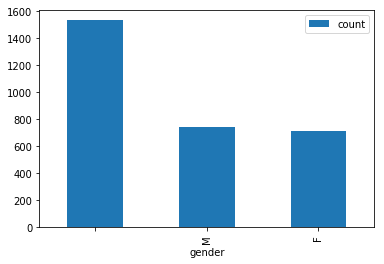

In [39]:
que = "select count(id), gender from  log_cc where count = 1 group by gender"
res=sql.read_sql(que,con=conn)
print(res.head())
df = res
df.plot(kind='bar',x='gender',y='count')

In [ ]:
PERSONAS POR ZONA DETECTADAS POR LOS BEACONS

   id_beacon  contar location_description
0          1       1            Baños Sur
1          2       1          Baños Norte


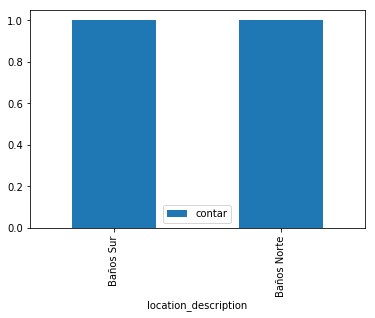

In [40]:
que = 'SELECT * from "beacons_heat"'
res=sql.read_sql(que,con=conn)
print(res.head())
df = res
df.plot(kind='bar',x='location_description',y='contar')

   id_tienda  monto   nombre
0          1   1811  Joyeria
1          9    331    Apple


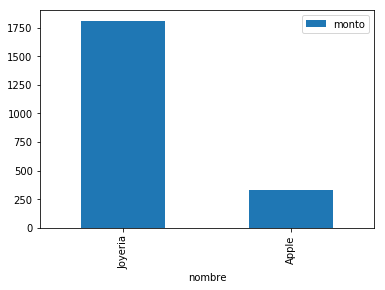

In [41]:
que = 'SELECT * from "Ventas_mes"'
res=sql.read_sql(que,con=conn)
print(res.head())
df = res
df.plot(kind='bar',x='nombre',y='monto')

In [44]:
que = "select nueva_compra(1,21291715,300)"
res=sql.read_sql(que,con=conn)
print(res.head())

DatabaseError: Execution failed on sql 'select nueva_compra(1,21291715,300)': Cliente no esta presente en el cc
CONTEXT:  PL/pgSQL function validar_venta() line 14 at RAISE
SQL statement "INSERT INTO ventas (id_tienda,monto,mac_add,hora_entrada) VALUES (tienda_id_e, monto_e, n2, n3)"
PL/pgSQL function nueva_compra(integer,integer,integer) line 13 at SQL statement
